# Assignment 2 - Machine Learning Basics

## *Ana Belen Barcenas Jimenez*
Netid:  *ab713*

Github link: https://github.com/abbarcenasj/machine-learning-course/

## Learning Objectives:
1. Be able to apply basic regression and classification supervised learning techniques to data and evaluate the performance of those methods
2. Understand the bias-variance tradeoff and how adjusting model flexibility impacts model selection and the training process

# Conceptual Questions

## 1
**[5 points]**
For each part (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

1. The sample size $n$ is extremely large, and the number of predictors $p$ is small.
2. The number of predictors $p$ is extremely large, and the number of observations $n$ is small.
3. The relationship between the predictors and response is highly non-linear.
4. The variance of the error terms, i.e. $\sigma^2 = Var(\epsilon)$, is extremely high

**ANSWER**

1. A flexible model could have a better performance since the sample size is big and could be more representative of the real data. If this is the case, we will not lead to overfitting and we will get less bias in the estimate of $f$. Also, if the number of predictors is small, it would be easy to interpret even if the model is complex.

2. An inflexible method would have a better performance. Fitting a flexible model would result in overfitting the few data points we have. Moreover, we will lose interpretability because we will be estimating a greater number of parameters.

3. A more flexible approach would be a better option. Otherwise we will not obtain good estimators of $y$ despite having lower bias in the model. However, we should be careful about how flexible the model will be to avoid overfitting.

4. If the variance is extremely high, that suggests that the model is overfitting the training data. Thus, I would choose a less flexible model that do not follow the training data points that closely.

## 2
**[5 points]** For each of the following, (i) explain if each scenario is a classification or regression problem, (ii) indicate whether we are most interested in inference or prediction for that problem, and (iii) provide the sample size $n$ and number of predictors $p$ indicated for each scenario.

**(a)** We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.

**(b)** We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.

**(c)** We are interesting in predicting the % change in the US dollar in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the dollar, the % change in the US market, the % change in the British market, and the % change in the German market.

**ANSWER**

**(a)**

**(i)** It is a regression problem because the dependent variables is continuous (log(salary)).
**(ii)** The main purpose of this problem is inference. The objective is to understand what factors determine CEO salaries and by how much. It could be a prediction problem if a CEO is running the regression to change some factors in their company to lead higher salary (but this does not make too much sense in real life).
**(iii)** Sample size: 500. Number of predictors: 3.

**(b)**

**(i)** This one is a classification problem: success=1 and failure=0. 
**(ii)** We are interested in prediction. We are not concerned about how much each factor is related with success for the previously launched products, but we want to know if a new product with given characteristics is going to succedd or not. 
**(iii)** Sample size: 20. number of predictors: 13.

**(c)**

**(i)** This one is a regression problem because the % change is a continuous variable. 
**(ii)** For this problem the most common goal is prediction. However, if the objective is to understand which market (US market, British market, and German market) affects the % change in the US dollar the most, it would be an inference problem. 
**(iii)** Sample size: 52 weeks (weeks in 2012). Number of predictors: 3 variables.

# Practical Questions

## 3
**[20 points] Classification I: Creating a classification algorithm**.

**(a)** Build a working version of a binary kNN classifier using the skeleton code below.

**(b)** Load the datasets to be evaluated here. Each includes training features ($\mathbf{X}$), and test features ($\mathbf{y}$) for both a low dimensional ($p = 2$ features/predictors) and a high dimensional ($p = 100$ features/predictors). For each of these datasets there are $n=100$ observations of each. They can be found in the `data` subfolder in the `assignments` folder on github. Each file is labeled similar to `A2_X_train_low.csv`, which lets you know whether the dataset is of features, $X$, targets, $y$; training or testing; and low or high dimensions.

**(c)** Train your classifier on first the low dimensional dataset and then the high dimensional dataset with $k=5$. Evaluate the classification performance on the corresponding test data for each. Calculate the time it takes to make the predictions in each case and the overall accuracy of each set of test data predictions.

**(d)** Compare your implementation's accuracy and computation time to the scikit learn [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class. How do the results and speed compare?

**(e)** Some supervised learning algorithms are more computationally intensive during training than testing. What are the drawbacks of the prediction process being slow?

**ANSWER**

In [63]:
# (a) Write your own kNN classifier
from scipy.spatial import distance

class Knn:
# k-Nearest Neighbor class object for classification training and testing
    def __init__(self):
        self.x = None
        self.y = None
    
    def fit(self, x, y):
        # Save the training data to properties of this class
        self.x = x.values
        self.y = y.values
        pass
      
    def predict(self, x, k):
        y_hat = [] # Variable to store the estimated class label for 
        # Calculate the distance from each vector in x to the training data
        for row in x.values:
            NN = self.nearest_dst(row, k)
            y_hat.append(NN)
        # Return the estimated targets
        return y_hat

    def nearest_dst(self, r, k):
        NN = []
        dist = [self.euclidean_dst(r, row) for row in self.x]  
        closeness = sorted(dist)
        closeness = closeness[:k]
        for i in closeness:
            index = dist.index(i)
            y = self.y[index][0]
            NN.append(y)
        return max(NN, key = NN.count)
    
    def euclidean_dst(self, a,b):
        return distance.euclidean(a,b)
        

    
# Metric of overall classification accuracy
#  (a more general function, sklearn.metrics.accuracy_score, is also available)
def accuracy(y,y_hat):
    nvalues = len(y)
    accuracy = sum(y == y_hat) / nvalues
    return accuracy

In [64]:
# (d) Load the datasets
import pandas as pd

x_train_low = pd.read_csv('Data/A2_X_train_low.csv',  header=None)
y_train_low = pd.read_csv('Data/A2_y_train_low.csv',  header=None)
x_test_low = pd.read_csv('Data/A2_X_test_low.csv',  header=None)
y_test_low = pd.read_csv('Data/A2_y_test_low.csv',  header=None)

x_train_high = pd.read_csv('Data/A2_X_train_high.csv',  header=None)
y_train_high = pd.read_csv('Data/A2_y_train_high.csv',  header=None)
x_test_high = pd.read_csv('Data/A2_X_test_high.csv',  header=None)
y_test_high = pd.read_csv('Data/A2_y_train_high.csv',  header=None)

In [65]:
# (c.1) Train the classifier on first the low dimensional dataset and then the high dimensional dataset with k=5.
# Then, evaluate the performance of your kNN classifier on a low- and a 
# high-dimensional dataset and time the predictions of each
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import time

# Implemented KNN classifier
k_nearest_n = Knn()
t1 = time.time()
fit = k_nearest_n.fit(x_train_low, y_train_low)
pred1 = k_nearest_n.predict(x_test_low, 5)
t2 = time.time()
accuracy1 = metrics.accuracy_score(y_test_low, pred1)

# Sklearn KNN Classifier
k_nearest_n_SP = KNeighborsClassifier(n_neighbors=5)
t1_2 = time.time()
k_nearest_n_SP.fit(x_train_low,y_train_low)
pred2 = k_nearest_n_SP.predict(x_test_low)
t2_2 = time.time()
accuracy2 = metrics.accuracy_score(y_test_low, pred2)

print("Low dimensional dataset time comparison:")
print(f"Implemented KNN accuracy: {accuracy1} and the computation time was: {t2-t1} s")
print(f"Sklearn KNN accuracy: {accuracy2} and the computation time was: {t2_2-t1_2} s")



Low dimensional dataset time comparison:
Implemented KNN accuracy: 0.925 and the computation time was: 14.65674114227295 s
Sklearn KNN accuracy: 0.925 and the computation time was: 0.0025081634521484375 s


/Users/anabelen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [62]:
# Implemented KNN classifier
k_nearest_n = Knn()
t1 = time.time()
fit = k_nearest_n.fit(x_train_high, y_train_high)
pred1 = k_nearest_n.predict(x_test_high, 5)
t2 = time.time()
accuracy1 = metrics.accuracy_score(y_test_high, pred1)

# Sklearn KNN Classifier
k_nearest_n_SP = KNeighborsClassifier(n_neighbors=5)
t1_2 = time.time()
k_nearest_n_SP.fit(x_train_high,y_train_high)
pred2 = k_nearest_n_SP.predict(x_test_high)
t2_2 = time.time()
accuracy2 = metrics.accuracy_score(y_test_high, pred2)

print("Low dimensional dataset time comparison:")
print(f"Implemented KNN accuracy: {accuracy1} and the computation time was: {t2-t1} s")
print(f"Sklearn KNN accuracy: {accuracy2} and the computation time was: {t2_2-t1_2} s")


Low dimensional dataset time comparison:
Implemented KNN accuracy: 0.993 and the computation time was: 15.023375034332275 s
Sklearn KNN accuracy: 0.993 and the computation time was: 0.15648794174194336 s


/Users/anabelen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if sys.path[0] == '':


(d) The accuracy obtained using the implemented classifier and the Scikit learn classifier are exaclty the same. However, the algorithm is optimized in Scikit learn because the running time is considerably faster.

(e) If the testing/prediction process is slow as it is the case with KNN, it will not be efficient to employ this method in problems where the objective is to get real time predictions for immediate decision-making.

## 4
**[10 points] Classification II**. The table below provides a training dataset containing six observations ($n=6$), three predictors ($p=3$), and one qualitative response variable.

*Table 1. Dataset with $n=6$ observations in $p=3$ dimensions with a categorical response, $y$*

| Obs. | $x_1$ | $x_2$ | $x_3$ | $y$   |
|------|-------|-------|-------|-------|
| **1**| 0     | 3     | 0     | Red   |
| **2**| 2     | 0     | 0     | Red   |
| **3**| 0     | 1     | 3     | Red   |
| **4**| 0     | 1     | 2     | Blue  |
| **5**| -1    | 0     | 1     | Blue  |
| **6**| 1     | 1     | 1     | Red   |

We want to use this dataset to make a prediction for $y$ when $x_1=x_2=x_3=0$ using $K$-nearest neighbors. You are given some code below to get you started.

**(a)** Compute the Euclidean distance between each observation and the test point, $x_1=x_2=x_3=0$. Present your answer in a table similar in style to Table 1 with observations 1-6 as the row headers.

**(b)** What is our prediction with $K=1$? Why?

**(c)** What is our prediction with $K=3$? Why?

**(d)** If the Bayes decision boundary (the optimal decision boundary) in this problem is highly nonlinear, then would we expect the *best* value of $K$ to be large or small? Why?

**ANSWER**

In [14]:
import numpy as np

X = np.array([[ 0, 3, 0],
              [ 2, 0, 0],
              [ 0, 1, 3],
              [ 0, 1, 2],
              [-1, 0, 1],
              [ 1, 1, 1]])
y = np.array(['Red','Red','Red','Blue','Blue','Red'])

In [13]:
# (a)
from scipy.spatial import distance
import pandas as pd

# Initialize the test point and an empty list 
# where the distances will be stored
test_p = (0, 0, 0)
dst = []
# Compute the distance to each point
for i in range(len(X)):
    dst.append(distance.euclidean(test_p, X[i]))
    pass

dst_df = pd.DataFrame(data = {"Obs":[1,2,3,4,5,6],"Euclidean Dist.":dst})
dst_df.set_index('Obs', inplace=True)
dst_df.columns.name = dst_df.index.name
dst_df.index.name = None

dst_df



Obs,Euclidean Dist.
1,3.000000
2,2.000000
3,3.162278
4,2.236068
5,1.414214
6,1.732051


In [18]:
# (b)

mappings = {1:'Red',2:'Blue'}
y2 = np.array([ 1  ,1 , 1 , 2 , 2 , 1 ])
dst_np = np.argsort(np.array(dst))
index = (np.where(np.isin(dst_np, [0])))
color1 = (mappings[int(y2[index])])
print("The prediction whit K = 1 is %s." % (color1))

The prediction whit K = 1 is Blue.


The reason why the prediction is blue is because the closest point (k=1) is blue. Thus, the color of the point with the smaller euclidian distance is assigned as the predicted value.

In [76]:
# (c)

index2 = (np.where(np.isin(dst_np, [range(1,3)])))
color2 = (mappings[int(np.argmax(np.bincount(y2[index2])))])
print("The prediction whit K = 3 is %s." % (color2))

The prediction whit K = 3 is Red.


In this case, the prediction will be red becuase two of the closest points are red and just one is blue. Thus, the prediction will be that the point is going to be red as most of their 3 nearest neighbors.

(d) In that case, we would expect the best value of $K$ to be small since we would need to add flexibility to the model to fit the data properly.

## 5
**[20 points] Bias-variance tradeoff I: Understanding the tradeoff**. This exercise will illustrate the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

**(a)** Create a synthetic dataset (with both features and targets). Use the [`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons) module with the parameter `noise=0.35` to generate 1000 random samples.

**(b)** Scatterplot your random samples with each class in a different color

**(c)** Create 3 different data subsets by selecting 100 of the 1000 data points at random three times. For each of these 100-sample datasets, fit three k-Nearest Neighbor classifiers with: $k = \{1, 25, 50\}$. This will result in 9 combinations (3 datasets, with 3 trained classifiers).

**(d)** For each combination of dataset trained classifier, in a 3-by-3 grid, plot the decision boundary (similar in style to Figure 2.15 from *Introduction to Statistical Learning*). Each column should represent a different value of $k$ and each row should represent a different dataset.

**(e)** What do you notice about the difference between the rows and the columns. Which decision boundaries appear to best separate the two classes of data? Which decision boundaries vary the most as the data change?

**(f)** Explain the bias-variance tradeoff using the example of the plots you made in this exercise.

**ANSWER**

In [67]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import random
%matplotlib inline

# (a) 
X,Y = make_moons(n_samples=1000,noise=0.35)

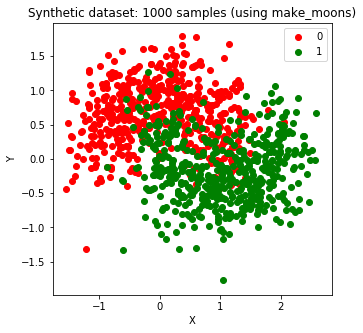

In [170]:
# (b)
plt.figure(figsize=(5,5))
plt.scatter(X[Y==0][:,0],X[Y==0][:,1],c="red",label="0")
plt.scatter(X[Y==1][:,0],X[Y==1][:,1],c="green",label="1")
plt.title("Synthetic dataset: 1000 samples (using make_moons)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

In [97]:
# (c)

# Create 3 different data subsets by selecting 
# 100 of the 1000 data points at random
index1 = random.sample(range(1,1000),100)
X1 = X[index1]
Y1 = Y[index1]

index2 = random.sample(range(1,1000),100)
X2 = X[index2]
Y2 = Y[index2]

index3 = random.sample(range(1,1000),100)
X3 = X[index3]
Y3 = Y[index3]


# Fit three k-Nearest Neighbor classifiers with:  k={1,25,50}
KNN1_1 = KNeighborsClassifier(n_neighbors=1)
KNN1_1.fit(X1,Y1)
KNN1_2 = KNeighborsClassifier(n_neighbors=25)
KNN1_2.fit(X1,Y1)
KNN1_3 = KNeighborsClassifier(n_neighbors=50)
KNN1_3.fit(X1,Y1)

KNN2_1 = KNeighborsClassifier(n_neighbors=1)
KNN2_1.fit(X2,Y2)
KNN2_2 = KNeighborsClassifier(n_neighbors=25)
KNN2_2.fit(X2,Y2)
KNN2_3 = KNeighborsClassifier(n_neighbors=50)
KNN2_3.fit(X2,Y2)

KNN3_1 = KNeighborsClassifier(n_neighbors=1)
KNN3_1.fit(X3,Y3)
KNN3_2 = KNeighborsClassifier(n_neighbors=25)
KNN3_2.fit(X3,Y3)
KNN3_3 = KNeighborsClassifier(n_neighbors=50)
KNN3_3.fit(X3,Y3)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=50, p=2,
           weights='uniform')

In [153]:
# (d) Plot the decision boundaries

from matplotlib.colors import ListedColormap
def plotDecisionBoundary(X,Y,knn_model,k):
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])
    h = 0.02

    xx,yy = np.meshgrid(np.arange(-2,3),np.arange(-2,2))
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    #plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    plt.xlabel("x")
    plt.ylabel("y")

    plt.title("Decision Boundary (k = {})".format(k))
    pass
    
# SOURCE: https://stackoverflow.com/questions/19054923
#         /plot-decision-boundary-matplotlib

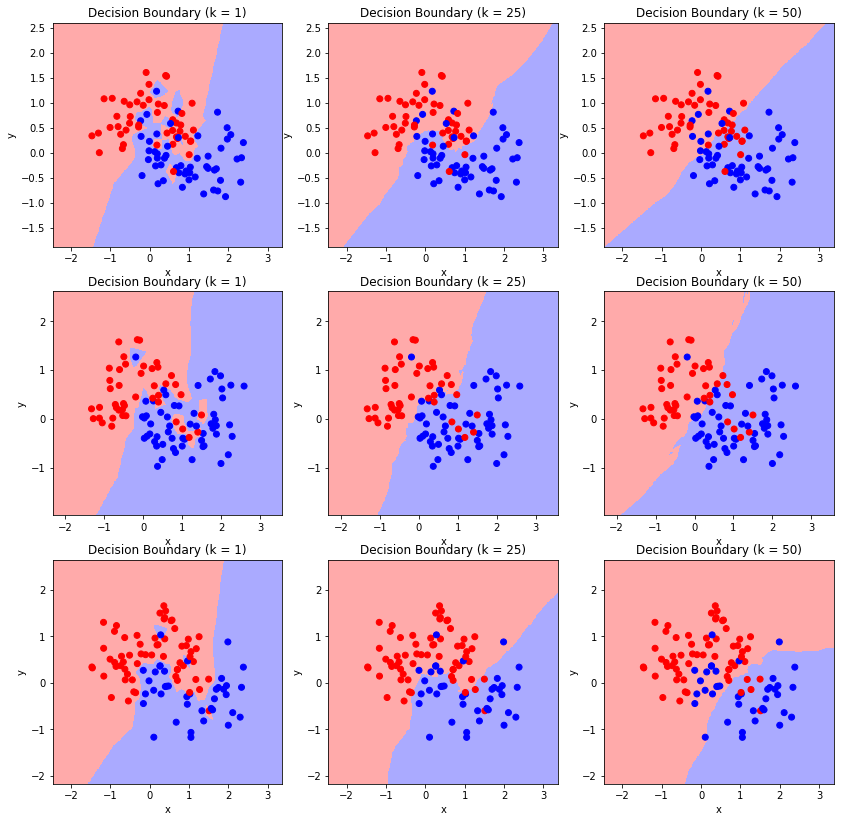

In [154]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 14
plt.figure()
plt.subplots(3,3)

# First random dataset
plt.subplot(331)
plotDecisionBoundary(X1,Y1,KNN1_1, 1)
plt.subplot(332)
plotDecisionBoundary(X1,Y1,KNN1_2, 25)
plt.subplot(333)
plotDecisionBoundary(X1,Y1,KNN1_3, 50)

# Second random dataset
plt.subplot(334)
plotDecisionBoundary(X2,Y2,KNN2_1, 1)
plt.subplot(335)
plotDecisionBoundary(X2,Y2,KNN2_2, 25)
plt.subplot(336)
plotDecisionBoundary(X2,Y2,KNN2_3, 50)

# Third random dataset 
plt.subplot(337)
plotDecisionBoundary(X3,Y3,KNN3_1, 1)
plt.subplot(338)
plotDecisionBoundary(X3,Y3,KNN3_2, 25)
plt.subplot(339)
plotDecisionBoundary(X3,Y3,KNN3_3, 50)

plt.show()

(e)


**Column differences:** The first column has boudaries that seems to be more flexible. The shape of the boundaries are complex compared with the boundaries in the last column.
**Rows difference:** Since the 3 datasets are random and are not related, the distribution of the points varies widely. However, for every row, the shape of the boundaries are similar compared with the same $k$ selected in the other two datasets, specially for $k=50$.
**Which one best separate?** The boundaries where k=1 separates better but the variance will be high. The boundary is overfitting the points in the training set.
**Which boundaries varies the most?** The boundaries that vary the most are the ones where $k=1$. This happens because that model is very flexible and is overfitting the data points in the training sample, increasing the variance as well.

(f)

In the cases where $k=1$ the variance is extremely high because we are overfitting the data. The performance would be great on the training sample, but when you input new data, the performance will suffer. On the other hand, when you increase $k$ to $k=50$ the decision boundary is almost linear but the optimal decision boundary is not. Then, we will be increasing the bias of the classification but the variance is pretty low. The optimal model should select a number of $k$ for wich the variance and the bias are not extreme in any direction. A model with that characteristics will be able to predict better out of sample.

## 6
**[20 points] Bias-variance trade-off II: Quantifying the tradeoff**. This exercise will explore the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

Here, the value of $k$ determines how flexible our model is.

**(a)** Using the function created earlier to generate random samples (using the `make_moons` function), create a new set of 1000 random samples, and call this dataset your test set and the previously created dataset your training set.

**(b)** Train a kNN classifier on your training set for $k = 1,2,...500$. Apply each of these trained classifiers to both your training dataset and your test dataset and plot the classification error (fraction of mislabeled datapoints).

**(c)** What trend do you see in the results?

**(d)** What values of $k$ represent high bias and which represent high variance?

**(e)** What is the optimal value of $k$ and why?

**(f)** In kNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?

**ANSWER**

In [113]:
# (a)

X_train, Y_train = X,Y
X_test, Y_test = make_moons(n_samples=1000, noise=0.35)

In [126]:
# (b)
acc_test =[]
acc_train =[]

for i in range(1,500):
    knn_class = KNeighborsClassifier(n_neighbors=i)
    knn_class.fit(X_train, Y_train)
    y_hat_train = knn_class.predict(X_train)
    y_hat_test = knn_class.predict(X_test)
    acc_train.append(1 - metrics.accuracy_score(Y_train,y_hat_train))
    acc_test.append(1- metrics.accuracy_score(Y_test,y_hat_test))

<function matplotlib.pyplot.show>

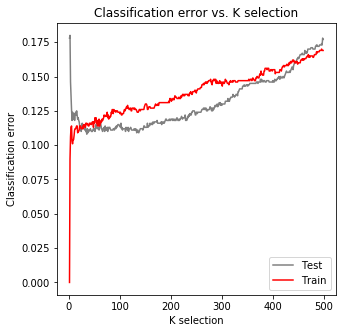

In [178]:
plt.figure(figsize=(5,5))
plt.plot(range(1,500), acc_test, label='Test', color="grey")
plt.plot(range(1,500), acc_train, label='Train', color="red")
plt.title("Classification error vs. K selection")
plt.xlabel("K selection")
plt.ylabel("Classification error")
plt.legend(loc='lower right')
plt.show

(c) 

When $K$ values are smaller such as 1 or near 1, the classification error is huge in the test data set due to overfitting the training data. Also, for $K$ values near 500, the classification error is higher in the test dataset due to a biased estimation (we are fitting a too inflexible model). In conclusion, the optimal $K$ should be something in the middle between 0 and 500, where the minimum point in the blue curve is achieved.

(d)

**High variance:** Values of K near 1.

**High bias:** Values of K near 500.

In [278]:
# (e)

# Get the minimum classification error in the test curve
min_error = min(acc_test)
opt = acc_test.index(min_error)

print(f"Optimal K = {opt}")


Optimal K = 34


(f)

In other models such as regression, the flexibility of them is controlled by the number and transformations of parameters.

## 7
**[20 points] Linear regression and nonlinear transformations**. You're given a dataset below that is partitioned into a training and testing dataset. Your goal is to develop a regression algorithm from the training data that performs well on the test data.

*Hint: Use the scikit learn [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) module.*

**(a)** Create a scatter plot of your training data.

**(b)** Estimate a linear regression model ($y = a_0 + a_1 x$) for the training data and calculate both the $R^2$ value and mean square error for the fit of that model for the training data. Also provide the equation representing the estimated model (e.g. $y = a_0 + a_1 x$, but with the estimated coefficients inserted.

**(c)** A linear model does not mean that non-linear relationships cannot be explored. From looking at the scatter plot of the training data, choose a transformation of the predictor variable, $x$ that may make sense for these data. This will be a multiple regression model of the form $y = a_0 + a_1 x_1 + a_2 x_2 + \ldots + a_n x_n$. Here $x_i$ could be any transformations of x - perhaps it's $\frac{1}{x}$, $log(x)$, $sin(x)$, $x^k$ (where $k$ is any power of your choosing). Provide the estimated equation for this multiple regression model (e.g. if you chose your predictors to be $x_1 = x$ and $x_2 = log(x)$, your model would be of the form $y = a_0 + a_1 x + a_2 log(x)$. Also provide the $R^2$ and mean square error of the fit for the training data.

**(d)** Using both of the models you created here in (b) and (c), plot the original data (as a scatter plot) and the two curves representing your models (each as a separate line).

**(e)** Using the models above, apply them to the test data and estimate the $R^2$ and mean square error of the test dataset.

**(f)** Which models perform better on the training data, and which on the test data? Why?

**(g)** Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? Why?

In [180]:
x_train = [3.19,9.26,9.38,8.77,7.91,3.79,3.18,7.61,2.36,6.26,6.62,1.53,6.25,7.93,7.07,4.58,4.14,2.14,9.04,4.56,3.99,6.71,2.51,0.84,6.13,5.22,0.25,3.60,1.36,5.59,4.81,1.14,0.36,2.31,1.37,5.86,4.23,9.48,2.26,0.77,4.33]
y_train = [46.40,172.16,209.00,203.31,82.88,62.57,14.38,177.00,8.01,82.35,84.84,-5.59,54.96,167.17,83.09,-21.63,94.64,63.97,106.57,38.99,88.26,66.99,-11.12,-0.44,65.08,61.47,-0.61,23.85,10.55,83.69,54.35,51.82,-18.63,1.98,4.90,55.44,50.09,155.66,45.57,18.12,30.58]

x_test = [5.65,0.07,8.84,5.14,6.65,1.35,5.45,7.39,3.35]
y_test = [98.52,16.09,198.45,75.90,85.11,47.64,14.76,141.03,-39.13]

**ANSWER**

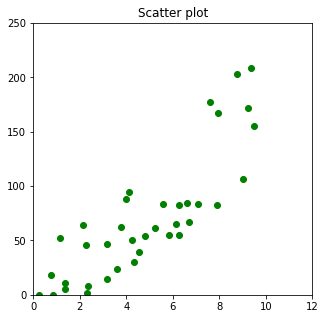

In [184]:
# (a) 
plt.figure(figsize=(5,5))
plt.title("Scatter plot")
plt.scatter(x_train,y_train, color="green")
plt.xlim(0,12)
plt.ylim(0,250)
plt.show()

In [201]:
# (b) 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import itertools

# Fitting a linear regression 
xtrain = np.array(x_train).reshape(-1,1)
ytrain = np.array(y_train).reshape(-1,1)
reg1 = LinearRegression().fit(xtrain, ytrain)

# Predicted Y, R-square, and MSE
y_hat = (reg1.predict(np.array(x_train).reshape(-1,1)))

print("R-square = "+str(r2_score(y_train,y_hat)))
print("MSE = "+str(mean_squared_error(np.array(y_train).reshape(-1,1),y_hat)))
print("Model equation: y = ({})+({}x)".format(reg1.coef_[0][0].round(2), reg1.intercept_[0] ))

R-square = 0.7014590913812251
MSE = 1052.5853662498014
Model equation: y = (18.3)+(-21.73078292905422x)


(c)

The scatter plot shape suggests a logaritmic transformation of the regressor:

In [237]:
import math

# Obtain the log transformation of X
log_x_train = [math.log(x) for x in x_train]

# Include the new regressor in the dataset
x_train2 = np.c_[np.array(x_train), np.array(log_x_train)]

# Fitting a regression
ytrain = np.array(y_train).reshape(-1,1)
reg2 = LinearRegression().fit(x_train2,y_train)


# Predicted Y, R-square, and MSE
y_hat2 = reg2.coef_

print("R-square = "+str(reg2.score(x_train2,y_train)))
print("MSE = "+str(mean_squared_error(y_train,reg2.predict(x_train2))))


print("Model equation: y = {0}+{1}x+{2}log(x)".format(reg2.intercept_, (reg2.coef_)[0],
                                                   (reg2.coef_)[1]))

R-square = 0.7219455369854199
MSE = 980.3549541792602
Model equation: y = -23.680150129907396+25.08280535865612x+-23.33063095557925log(x)


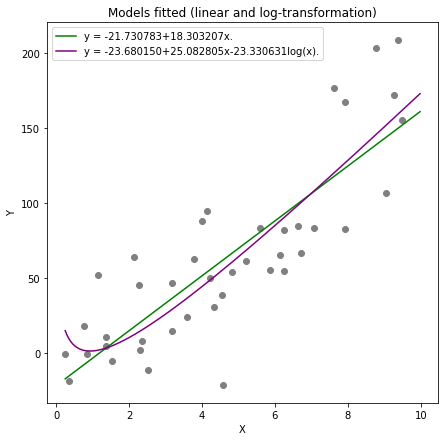

In [254]:
# (d)

plt.figure(figsize = (7,7))
plt.scatter(x_train, y_train, color="grey")
x_axis = np.linspace(min(x_train),max(x_train)+0.5, 500)

# Linear regression plot
linear_reg = reg1.intercept_[0] + reg1.coef_[0] * x_axis
plt.plot(x_axis, np.array(linear_reg).reshape(-1,1),'r', 
         label="y = %f+%fx." % (reg1.intercept_[0],reg1.coef_[0]), color="green")

# Regression with log transformation
log_x_ds = np.array([math.log(i) for i in x_axis])
log_reg = reg2.intercept_+(reg2.coef_)[0]*x_axis+(reg2.coef_)[1]*log_x_ds
plt.plot(x_axis, log_reg,'g', label = "y = %f+%fx%flog(x)." % 
         (reg2.intercept_,(reg2.coef_)[0], (reg2.coef_)[1]), color="purple")

# Adding labels and title
plt.title("Models fitted (linear and log-transformation)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

In [263]:
# (e)

# Fitting the FIRST model to the test data
reg1_test = reg1.score(np.array(x_test).reshape(-1,1), np.array(y_test).reshape(-1,1))

print("Simple linear model (no transformations):")
print("Test data R-squared: %f." % (r2_score(y_test,y_hat_test)))
y_hat_test = reg1.predict(np.array(x_test).reshape(-1,1))
mse = mean_squared_error(y_hat_test, np.array(y_test).reshape(-1,1))
print("Test data MSE: %f." % (mean_squared_error(np.array(y_test).reshape(-1,1),y_hat_test)))

Simple linear model (no transformations):
Test data R-squared: 0.555647.
Test data MSE: 2023.312109.


In [272]:
# Fitting the SECOND model to the test data

# Create the log transformation in the test data
log_x_test = [math.log(x) for x in x_test]
log_x_test_ds = np.c_[np.array(x_test), np.array(log_x_test)]

# Fitting the linear model with log transformation
reg2_test = reg2.score(log_x_test_ds, np.array(y_test).reshape(-1,1))

print("Model with log transformation:")
print("Test data R-squared: %f." % ((reg2.score(log_x_test_ds,y_test))))
y_hat_test2 = reg2.predict(log_x_test_ds)
mse2 = mean_squared_error(y_hat_test2, np.array(y_test).reshape(-1,1))
print("Test data MSE: %f." % (mse2))


Model with log transformation:
Test data R-squared: 0.631850.
Test data MSE: 1676.328705.


(f)

In this case, the model with the transformation performs better in both the training and test datasets. Despite the model with the log-transformation is more flexible (and the variance increase), it seems that the bias reduced by including the transformation helps more than the drawbacks derived from selecting a complex model.

(g)

If the test data were significantly different from the training dataset, the more flexible model (the onw with the log transformation) would perform worse compared with the simpler model. The predictive capability could be higher if a simpler model were selected in this case. This could happen because with the transformation we are getting closer to the form of the training dataset, and if those datapoints are not representative of the actual data, the predictive capability will suffer.